In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans

# supress scientific notation
np.set_printoptions(suppress=True)

import wrangle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,...,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,acres,age,dollar_per_sqft,dollar_per_acre,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,53571.0,1286.0,96978.0,...,1023282.0,537569.0,11013.72,0.025595,2017-01-01,0.103444,19.0,156.681613,5.196739e+06,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,13091.0,2061.0,97099.0,...,464000.0,376000.0,5672.48,0.055619,2017-01-01,0.290335,50.0,60.068259,1.295055e+06,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,21412.0,1286.0,97078.0,...,564778.0,479489.0,6488.30,0.005383,2017-01-01,0.193572,55.0,68.615447,2.477057e+06,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,396551.0,3101.0,96330.0,...,145143.0,36225.0,1777.51,-0.103410,2017-01-01,0.299311,47.0,45.840909,1.210278e+05,Los_Angeles
6,12095076,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,47019.0,3101.0,96293.0,...,773303.0,496619.0,9516.26,-0.001011,2017-01-01,1.446281,67.0,93.411209,3.433766e+05,Los_Angeles


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46763 entries, 0 to 77573
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      46763 non-null  int64  
 1   bathroomcnt                   46763 non-null  float64
 2   bedroomcnt                    46763 non-null  float64
 3   calculatedfinishedsquarefeet  46763 non-null  float64
 4   fips                          46763 non-null  float64
 5   latitude                      46763 non-null  float64
 6   longitude                     46763 non-null  float64
 7   regionidcity                  46763 non-null  float64
 8   regionidcounty                46763 non-null  float64
 9   regionidzip                   46763 non-null  float64
 10  structuretaxvaluedollarcnt    46763 non-null  float64
 11  taxvaluedollarcnt             46763 non-null  float64
 12  landtaxvaluedollarcnt         46763 non-null  float64
 13  t

<AxesSubplot:>

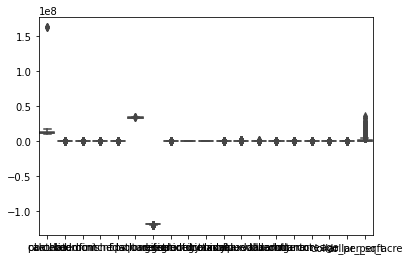

In [5]:
sns.boxplot(data = df)

In [6]:
df.drop(columns = ['parcelid', 'county', 'transactiondate'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46763 entries, 0 to 77573
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   46763 non-null  float64
 1   bedroomcnt                    46763 non-null  float64
 2   calculatedfinishedsquarefeet  46763 non-null  float64
 3   fips                          46763 non-null  float64
 4   latitude                      46763 non-null  float64
 5   longitude                     46763 non-null  float64
 6   regionidcity                  46763 non-null  float64
 7   regionidcounty                46763 non-null  float64
 8   regionidzip                   46763 non-null  float64
 9   structuretaxvaluedollarcnt    46763 non-null  float64
 10  taxvaluedollarcnt             46763 non-null  float64
 11  landtaxvaluedollarcnt         46763 non-null  float64
 12  taxamount                     46763 non-null  float64
 13  l

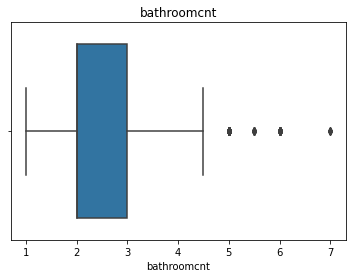

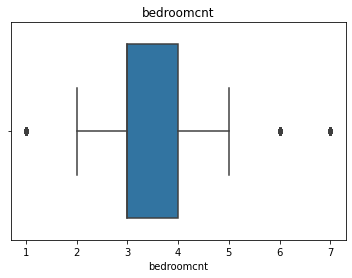

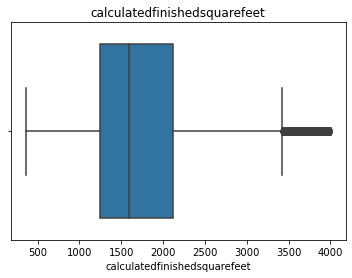

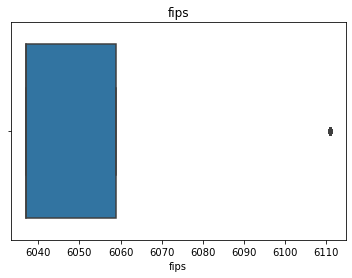

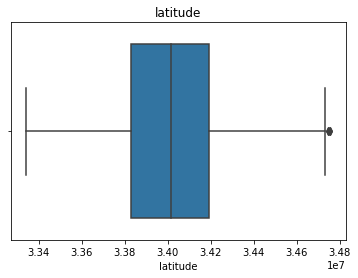

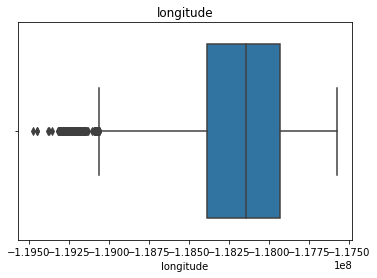

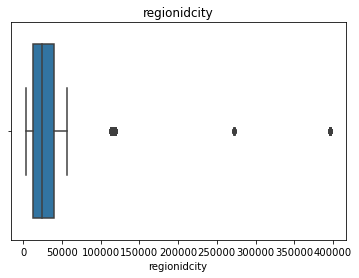

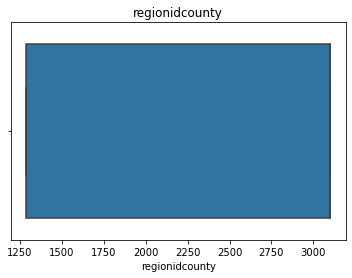

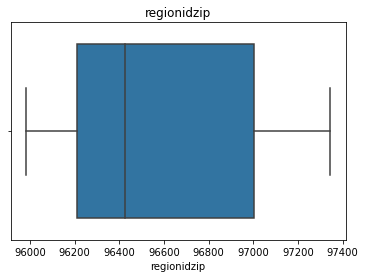

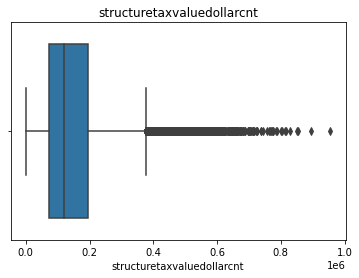

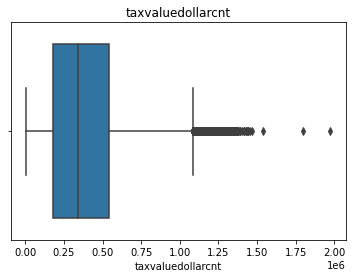

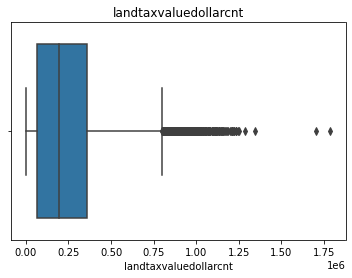

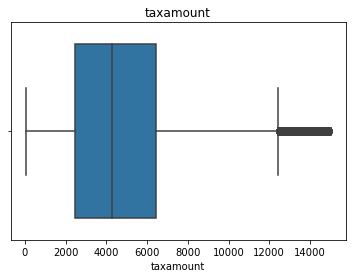

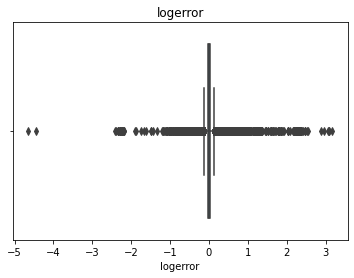

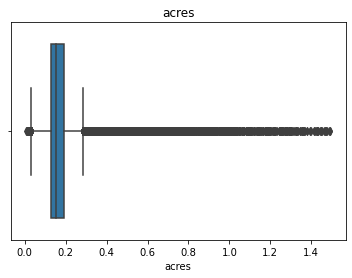

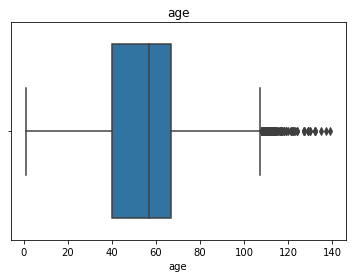

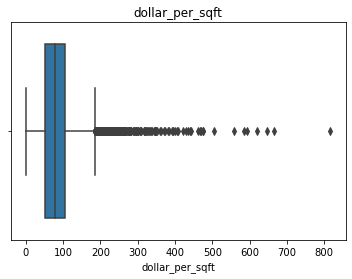

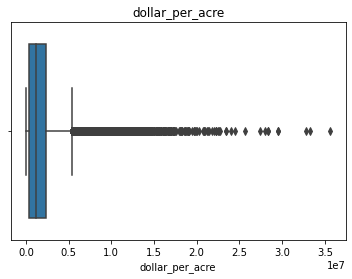

In [8]:
# visualize features for outliers
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,46763.0,2.141458e+00,7.944417e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
bedroomcnt,46763.0,3.230161e+00,8.690854e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
calculatedfinishedsquarefeet,46763.0,1.739177e+03,6.728621e+02,3.600000e+02,1.241000e+03,1.588000e+03,2.114000e+03,3.998000e+03
fips,46763.0,6.049283e+03,2.125570e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,46763.0,3.402485e+07,2.720829e+05,3.334062e+07,3.383091e+07,3.401523e+07,3.419078e+07,3.475508e+07
longitude,46763.0,-1.181902e+08,3.546282e+05,-1.194753e+08,-1.183849e+08,-1.181432e+08,-1.179326e+08,-1.175723e+08
regionidcity,46763.0,3.397859e+04,5.080947e+04,3.491000e+03,1.244700e+04,2.481200e+04,4.022700e+04,3.965560e+05
regionidcounty,46763.0,2.525255e+03,8.024189e+02,1.286000e+03,1.286000e+03,3.101000e+03,3.101000e+03,3.101000e+03
regionidzip,46763.0,9.657344e+04,4.215741e+02,9.598200e+04,9.621200e+04,9.642400e+04,9.700100e+04,9.734400e+04
structuretaxvaluedollarcnt,46763.0,1.479262e+05,1.056011e+05,1.480000e+02,7.282800e+04,1.210000e+05,1.939485e+05,9.552760e+05


In [10]:
# df = df[df.fips == 6059]

In [11]:
df.sample(25)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age,dollar_per_sqft,dollar_per_acre
24779,2.5,3.0,1987.0,6059.0,33557991.0,-117701369.0,25459.0,1286.0,96987.0,275761.0,534613.0,258852.0,5428.62,0.091852,0.107920,22.0,138.782587,2.398552e+06
23564,3.0,4.0,2800.0,6037.0,33951262.0,-117999323.0,14634.0,3101.0,96173.0,132865.0,170950.0,38085.0,2283.18,-0.012717,0.398600,63.0,47.451786,9.554700e+04
14262,2.0,4.0,2028.0,6037.0,34680855.0,-118174675.0,5534.0,3101.0,97319.0,207106.0,258882.0,51776.0,3870.34,0.004702,0.204798,49.0,102.123274,2.528150e+05
13679,2.0,3.0,1999.0,6037.0,34218709.0,-118416140.0,12447.0,3101.0,96450.0,122018.0,254646.0,132628.0,3276.75,0.556238,0.172176,63.0,61.039520,7.703034e+05
48130,2.0,3.0,1860.0,6059.0,33793063.0,-117922229.0,24832.0,1286.0,97047.0,168182.0,439835.0,271653.0,5425.16,-0.011661,0.257851,63.0,90.420430,1.053526e+06
13832,3.0,4.0,2870.0,6059.0,33511903.0,-117686541.0,25459.0,1286.0,96987.0,275823.0,530378.0,254555.0,5314.92,0.036341,0.241047,28.0,96.105575,1.056040e+06
63021,3.0,4.0,2674.0,6037.0,33929588.0,-118425785.0,55753.0,3101.0,96103.0,199898.0,380116.0,180218.0,4380.95,0.011502,0.129568,39.0,74.756171,1.390910e+06
73821,1.0,2.0,968.0,6037.0,34027188.0,-118444804.0,12447.0,3101.0,96045.0,104023.0,702157.0,598134.0,8525.37,0.021283,0.114853,93.0,107.461777,5.207819e+06
42299,2.0,3.0,1841.0,6037.0,34018210.0,-118366998.0,12447.0,3101.0,95997.0,235334.0,700521.0,465187.0,8583.98,-0.053528,0.165129,67.0,127.829441,2.817120e+06
57725,3.0,4.0,2465.0,6111.0,34198826.0,-118918665.0,34278.0,2061.0,96351.0,340618.0,567695.0,227077.0,6166.76,-0.003693,0.125964,19.0,138.181744,1.802711e+06


In [12]:
# split data
train, validate, test = wrangle.split_data(df)

In [13]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age,dollar_per_sqft,dollar_per_acre
58664,2.0,4.0,1835.0,6037.0,33904380.0,-118136532.0,44116.0,3101.0,96208.0,36225.0,60433.0,24208.0,1049.48,0.009815,0.164922,67.0,19.741144,146784.587973
58627,2.5,4.0,2774.0,6059.0,33901728.0,-117853081.0,26531.0,1286.0,97068.0,150328.0,323045.0,172717.0,4063.56,0.078906,0.243802,54.0,54.191781,708432.440678
4891,2.0,3.0,1166.0,6111.0,34219641.0,-119162221.0,13150.0,2061.0,97107.0,136169.0,226946.0,90777.0,2545.40,0.014183,0.137006,55.0,116.783019,662574.752011
75490,3.0,4.0,2504.0,6059.0,33739429.0,-118000792.0,34780.0,1286.0,96990.0,83899.0,113820.0,29921.0,1771.68,0.009918,0.150826,50.0,33.505990,198380.328767
58604,2.0,3.0,1387.0,6037.0,34199981.0,-118418291.0,12447.0,3101.0,96450.0,206302.0,327117.0,120815.0,4105.62,-0.037152,0.160514,62.0,148.739726,752674.685355


<AxesSubplot:xlabel='fips', ylabel='logerror'>

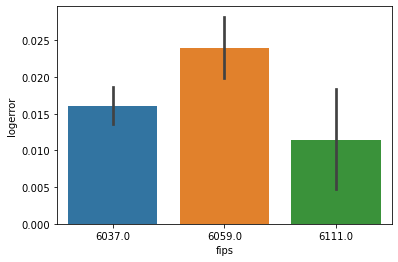

In [14]:
sns.barplot(data = train, x = 'fips', y = 'logerror')

In [15]:
train.groupby('fips').logerror.mean()

fips
6037.0    0.016064
6059.0    0.024009
6111.0    0.011487
Name: logerror, dtype: float64

<AxesSubplot:xlabel='logerror'>

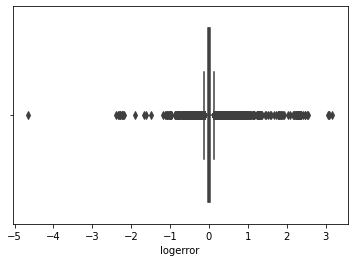

In [16]:
sns.boxplot(data = train, x = 'logerror')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

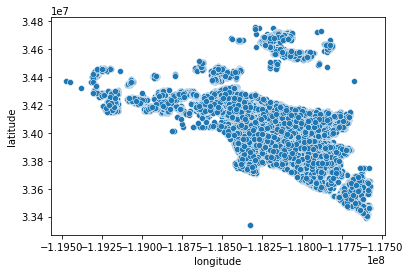

In [17]:
# pseudo map of data
sns.scatterplot(x='longitude',y='latitude',data=train, palette = 'turbo')

In [18]:
# scale data
scaler, train_scaled, validate_scaled, test_scaled = wrangle.min_max_scaler(train, validate, test)

In [19]:
print(train_scaled.shape)
print(validate_scaled.shape)
print(test_scaled.shape)


(26187, 18)
(11223, 18)
(9353, 18)


## Ask questions
- What can we cluster?
    - bed/bath/sqft
    - lat/long/age/fips/acres
    - structuretax/taxvaluedollar/landtax/taxamount/acres
    - acres/sqft
    - bed/bath/taxvalue
- What drives logerror?
    - Bed/bath/sqft Clusters on logerror
    - Bed on logerror
    - bath on logerror
    - sqft on logerror
    - fips on logerror

## Clustering workflow
1. Choose features, create dataframe X
2. Elbow method to find k
3. Kmeans to create clusters
4. Add clusters to dataframe
5. Create centroids df for plotting
6. Visualize clusters
7. Statistical tests for logerror

In [20]:
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age,dollar_per_sqft,dollar_per_acre
58664,0.166667,0.500000,0.405443,0.000000,0.398569,0.703670,0.103354,1.000000,0.165932,0.037617,0.026046,0.013463,0.066911,0.595731,0.107219,0.485294,0.024005,0.004116
58627,0.250000,0.500000,0.663551,0.297297,0.396694,0.852659,0.058616,0.000000,0.797357,0.157100,0.159662,0.096607,0.268526,0.604554,0.160242,0.389706,0.066236,0.019877
4891,0.166667,0.333333,0.221550,1.000000,0.621453,0.164543,0.024574,0.426997,0.825991,0.142273,0.110767,0.050732,0.166975,0.596289,0.088454,0.397059,0.142962,0.018590
75490,0.333333,0.500000,0.589335,0.297297,0.281951,0.775018,0.079603,0.000000,0.740088,0.087539,0.053209,0.016661,0.115220,0.595744,0.097744,0.360294,0.040879,0.005563
58604,0.166667,0.333333,0.282298,0.000000,0.607553,0.555571,0.022785,1.000000,0.343612,0.215713,0.161734,0.067549,0.271339,0.589734,0.104256,0.448529,0.182135,0.021119


## Cluster 1: features_cluster
- Bed Bath Sqft Taxvalue

In [21]:
# define features for clustering
X_train_feature_cluster = train_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]

#repeat for validate and test
X_validate_feature_cluster = validate_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]
X_test_feature_cluster = test_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]

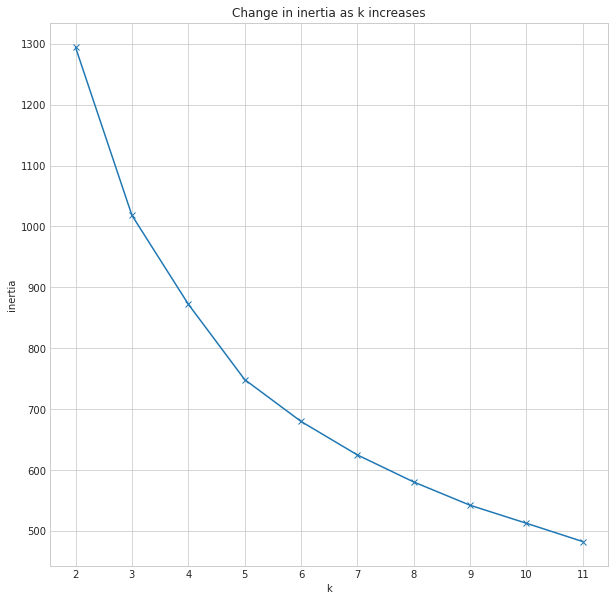

In [22]:
# elbow method to find k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    pd.Series({k: KMeans(k).fit(X_train_feature_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

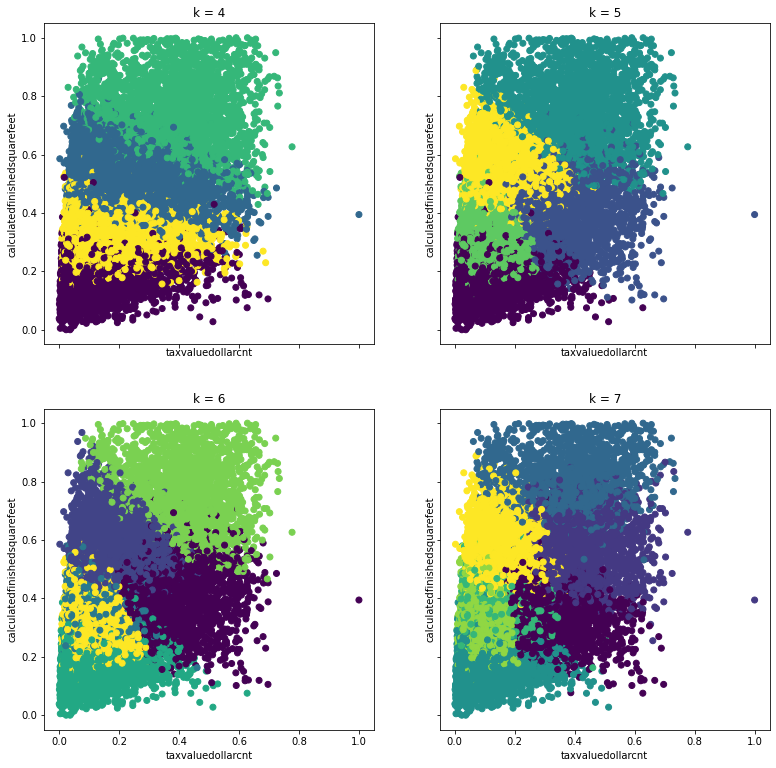

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 8)):
    clusters = KMeans(k).fit(X_train_feature_cluster).predict(X_train_feature_cluster)
    ax.scatter(X_train_feature_cluster.taxvaluedollarcnt, X_train_feature_cluster.calculatedfinishedsquarefeet, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='taxvaluedollarcnt', ylabel='calculatedfinishedsquarefeet')

possible k = 4, 5 or 6

We will be using k = 4

In [24]:
# define cluster object
kmeans = KMeans(n_clusters=5, random_state = 333)
# fit cluster object to features
kmeans.fit(X_train_feature_cluster)
# use the object
kmeans.predict(X_train_feature_cluster);

In [25]:
validate_scaled

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age,dollar_per_sqft,dollar_per_acre
70299,0.333333,0.500000,0.587411,0.000000,0.596911,0.451220,0.022785,1.0,0.298825,0.156148,0.120376,0.053888,0.207498,0.578516,0.167757,0.382353,0.073159,0.010607
42011,0.333333,0.666667,0.820231,0.000000,0.539818,0.922739,0.069752,1.0,0.357562,0.424931,0.579006,0.414839,0.882648,0.587567,0.146492,0.661765,0.148672,0.093118
5753,0.333333,0.666667,0.668499,0.000000,0.971393,0.693725,0.005198,1.0,0.980176,0.173858,0.101097,0.023204,0.226339,0.596628,0.091972,0.102941,0.072834,0.008205
49753,0.500000,0.666667,0.849368,0.000000,0.568822,0.827447,0.085289,1.0,0.353891,0.581418,0.400880,0.135171,0.819958,0.592815,0.120336,0.036765,0.197197,0.036757
76391,0.166667,0.166667,0.316658,0.297297,0.222061,0.964444,0.023614,0.0,0.744493,0.159067,0.318145,0.269943,0.664120,0.593109,0.065800,0.213235,0.123205,0.131020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52809,0.166667,0.333333,0.202859,0.000000,0.412822,0.685035,0.112630,1.0,0.104993,0.030025,0.027519,0.019143,0.079683,0.585258,0.138437,0.544118,0.032154,0.004558
41693,0.250000,0.333333,0.370808,0.297297,0.364734,0.909686,0.033768,0.0,0.767254,0.213828,0.327757,0.251242,0.466611,0.592277,0.107466,0.176471,0.146491,0.076215
12368,0.000000,0.333333,0.163551,0.000000,0.427856,0.711437,0.002328,1.0,0.087372,0.110267,0.194194,0.159643,0.321145,0.585510,0.093114,0.492647,0.135358,0.055622
70336,0.166667,0.333333,0.305113,0.297297,0.297218,0.786516,0.054294,0.0,0.784875,0.061480,0.053348,0.030746,0.126920,0.598343,0.108345,0.433824,0.049018,0.009274


In [26]:
# add cluster features to train and X_train df's
train_scaled['feature_cluster'] = kmeans.predict(X_train_feature_cluster)
validate_scaled['feature_cluster'] = kmeans.predict(X_validate_feature_cluster)
test_scaled['feature_cluster'] = kmeans.predict(X_test_feature_cluster)
X_train_feature_cluster['feature_cluster'] = kmeans.predict(X_train_feature_cluster)


In [27]:
# adjust column for plotting purposes
# train['feature_cluster'] = 'cluster_' + train.feature_cluster.astype(str)
# X_train['feature_cluster'] = 'cluster_' + X_train.feature_cluster.astype(str)

In [28]:
X_train_feature_cluster

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
58664,0.500000,0.166667,0.405443,0.026046,1
58627,0.500000,0.250000,0.663551,0.159662,2
4891,0.333333,0.166667,0.221550,0.110767,1
75490,0.500000,0.333333,0.589335,0.053209,2
58604,0.333333,0.166667,0.282298,0.161734,1
...,...,...,...,...,...
54280,0.333333,0.166667,0.384827,0.229971,4
19168,0.500000,0.166667,0.398296,0.020561,1
49013,0.333333,0.333333,0.664101,0.168289,2
62465,0.333333,0.000000,0.216877,0.191185,0


In [29]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age,dollar_per_sqft,dollar_per_acre
58664,2.0,4.0,1835.0,6037.0,33904380.0,-118136532.0,44116.0,3101.0,96208.0,36225.0,60433.0,24208.0,1049.48,0.009815,0.164922,67.0,19.741144,146784.587973
58627,2.5,4.0,2774.0,6059.0,33901728.0,-117853081.0,26531.0,1286.0,97068.0,150328.0,323045.0,172717.0,4063.56,0.078906,0.243802,54.0,54.191781,708432.440678
4891,2.0,3.0,1166.0,6111.0,34219641.0,-119162221.0,13150.0,2061.0,97107.0,136169.0,226946.0,90777.0,2545.40,0.014183,0.137006,55.0,116.783019,662574.752011
75490,3.0,4.0,2504.0,6059.0,33739429.0,-118000792.0,34780.0,1286.0,96990.0,83899.0,113820.0,29921.0,1771.68,0.009918,0.150826,50.0,33.505990,198380.328767
58604,2.0,3.0,1387.0,6037.0,34199981.0,-118418291.0,12447.0,3101.0,96450.0,206302.0,327117.0,120815.0,4105.62,-0.037152,0.160514,62.0,148.739726,752674.685355


In [30]:
X_train_feature_cluster.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
58664,0.500000,0.166667,0.405443,0.026046,1
58627,0.500000,0.250000,0.663551,0.159662,2
4891,0.333333,0.166667,0.221550,0.110767,1
75490,0.500000,0.333333,0.589335,0.053209,2
58604,0.333333,0.166667,0.282298,0.161734,1


In [31]:
pd.DataFrame(kmeans.cluster_centers_)



,0,1,2,3
0,0.213717,0.026561,0.193343,0.122737
1,0.371129,0.171370,0.305795,0.114785
2,0.504088,0.292982,0.523800,0.177627
3,0.531831,0.398474,0.742975,0.394633
4,0.333253,0.200571,0.383800,0.334485


In [32]:
# def get_centroids(kmeans, cluster_vars, cluster_name):
#     # get the centroids for each distinct cluster...

#     centroid_col_names = ['centroid_' + i for i in cluster_vars]

#     centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
#                                columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

#     return centroid_df

In [33]:
X_train_feature_cluster.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
58664,0.500000,0.166667,0.405443,0.026046,1
58627,0.500000,0.250000,0.663551,0.159662,2
4891,0.333333,0.166667,0.221550,0.110767,1
75490,0.500000,0.333333,0.589335,0.053209,2
58604,0.333333,0.166667,0.282298,0.161734,1


In [34]:
X_train_feature_cluster.loc[:, X_train_feature_cluster.columns != 'feature_cluster']

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
58664,0.500000,0.166667,0.405443,0.026046
58627,0.500000,0.250000,0.663551,0.159662
4891,0.333333,0.166667,0.221550,0.110767
75490,0.500000,0.333333,0.589335,0.053209
58604,0.333333,0.166667,0.282298,0.161734
...,...,...,...,...
54280,0.333333,0.166667,0.384827,0.229971
19168,0.500000,0.166667,0.398296,0.020561
49013,0.333333,0.333333,0.664101,0.168289
62465,0.333333,0.000000,0.216877,0.191185


In [35]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X_train_feature_cluster.loc[:, X_train_feature_cluster.columns != 'feature_cluster'].columns)

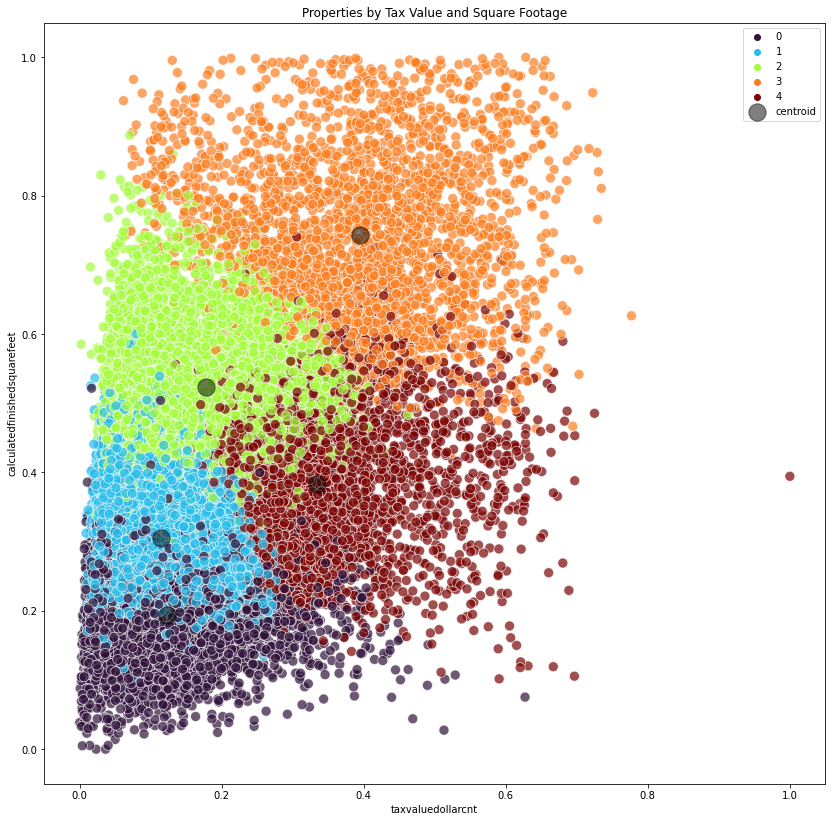

In [36]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_feature_cluster, x = 'taxvaluedollarcnt', y = 'calculatedfinishedsquarefeet', hue = 'feature_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='taxvaluedollarcnt',y='calculatedfinishedsquarefeet',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Properties by Tax Value and Square Footage')
plt.legend(loc = 'upper right')

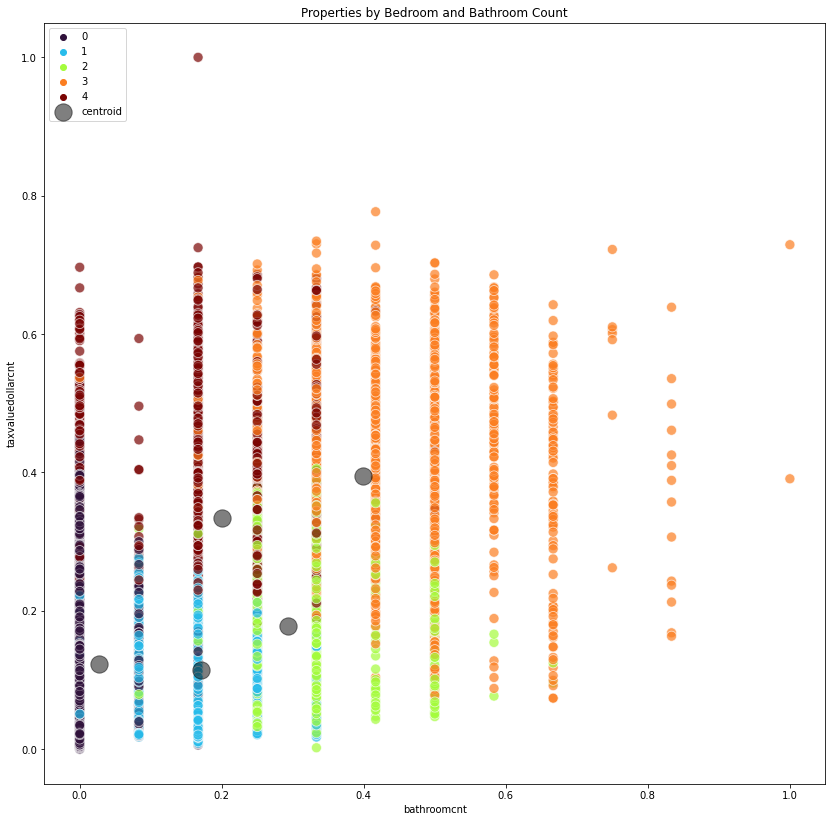

In [37]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_feature_cluster, x = 'bathroomcnt', y = 'taxvaluedollarcnt', hue = 'feature_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='bathroomcnt',y='taxvaluedollarcnt',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Properties by Bedroom and Bathroom Count')
plt.legend(loc = 'upper left')

Cluster 1 = low taxvalue, low sqft, low bed/bath
    Small houses with few bed/bath
    
Cluster 2 = low-mid tax, low-mid sqft, low-mid bed/bath
    Small houses with a couple bed/bath
    
Cluster 3 = high taxvalue, high sqft, high bed/bath
    Large houses with more bathrooms
        MORE BATHS MORE RICH?
        
Cluster 4 = average taxvalue, diverse sqft : bed/bath

## Cluster 2: value_cluster
- structuretax/taxvaluedollar/landtax/taxamount

In [38]:
train_scaled.index

Int64Index([58664, 58627,  4891, 75490, 58604, 28073,  1856, 71214, 16258,
            33051,
            ...
            21180,  2051, 51788,  9946,  3970, 54280, 19168, 49013, 62465,
            60389],
           dtype='int64', length=26187)

In [39]:
# define features for clustering
X_train_value_cluster = train_scaled[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]

#repeat for validate and test
X_validate_value_cluster = validate_scaled[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]
X_test_value_cluster = test_scaled[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]


In [40]:
X_train_value_cluster

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
58664,0.037617,0.026046,0.013463,0.066911
58627,0.157100,0.159662,0.096607,0.268526
4891,0.142273,0.110767,0.050732,0.166975
75490,0.087539,0.053209,0.016661,0.115220
58604,0.215713,0.161734,0.067549,0.271339
...,...,...,...,...
54280,0.128856,0.229971,0.189072,0.401465
19168,0.028281,0.020561,0.012419,0.059453
49013,0.248905,0.168289,0.057015,0.309882
62465,0.080314,0.191185,0.172346,0.323600


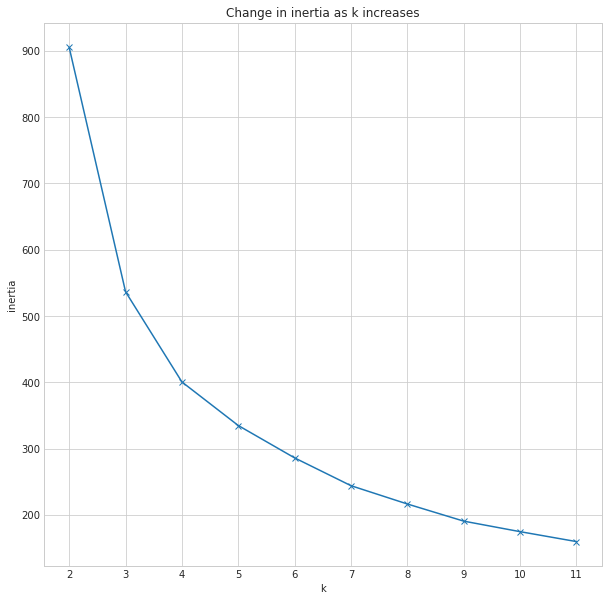

In [41]:
# elbow method to find k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    pd.Series({k: KMeans(k).fit(X_train_value_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

k = 4

In [42]:
# define cluster object
kmeans = KMeans(n_clusters=4, random_state = 333)
# fit cluster object to features
kmeans.fit(X_train_value_cluster)
# use the object
kmeans.predict(X_train_value_cluster);

In [43]:
X_train_value_cluster

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
58664,0.037617,0.026046,0.013463,0.066911
58627,0.157100,0.159662,0.096607,0.268526
4891,0.142273,0.110767,0.050732,0.166975
75490,0.087539,0.053209,0.016661,0.115220
58604,0.215713,0.161734,0.067549,0.271339
...,...,...,...,...
54280,0.128856,0.229971,0.189072,0.401465
19168,0.028281,0.020561,0.012419,0.059453
49013,0.248905,0.168289,0.057015,0.309882
62465,0.080314,0.191185,0.172346,0.323600


In [44]:
# add cluster features to train and X_train df's
train_scaled['value_cluster'] = kmeans.predict(X_train_value_cluster)
validate_scaled['value_cluster'] = kmeans.predict(X_validate_value_cluster)
test_scaled['value_cluster'] = kmeans.predict(X_test_value_cluster)


X_train_value_cluster['value_cluster'] = kmeans.predict(X_train_value_cluster);

In [45]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X_train_value_cluster.loc[:, X_train_value_cluster.columns != 'value_cluster'].columns)

In [46]:
centroids

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,0.074188,0.062114,0.033597,0.120841
1,0.348623,0.493662,0.361729,0.767745
2,0.149573,0.179619,0.122591,0.298791
3,0.215970,0.309265,0.229749,0.489058


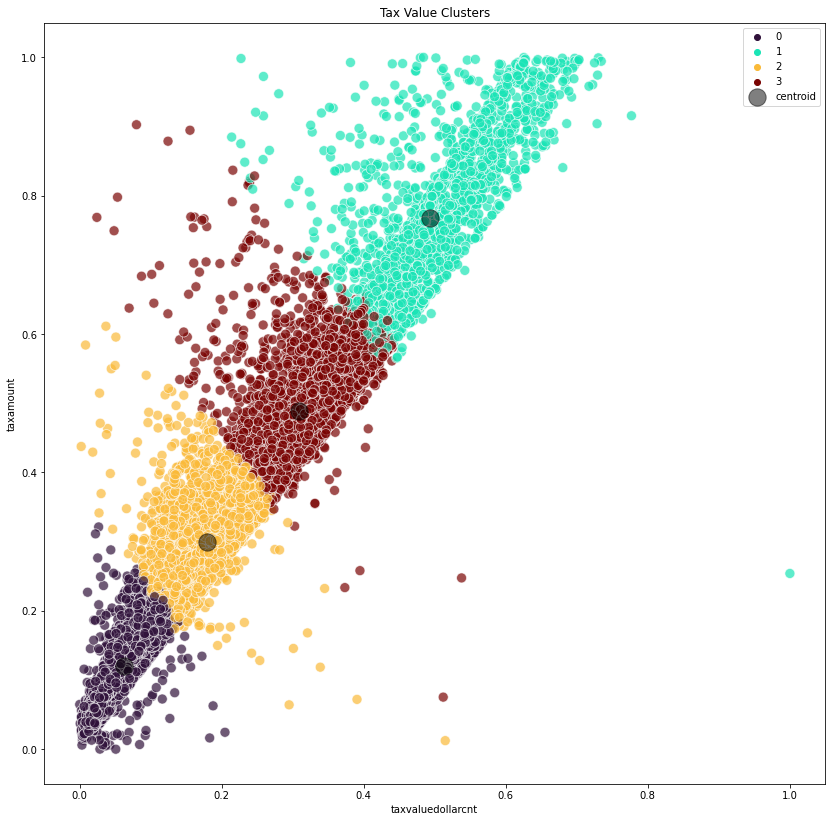

In [47]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_value_cluster, x = 'taxvaluedollarcnt', y = 'taxamount', hue = 'value_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='taxvaluedollarcnt',y='taxamount',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Tax Value Clusters')
plt.legend(loc = 'upper right')

## Cluster 3: development_cluster
- lat/long, age

In [48]:
X_train_development_cluster = train[['latitude','longitude','age']]
X_validate_development_cluster = validate[['latitude','longitude','age']]
X_test_development_cluster = test[['latitude','longitude','age']]

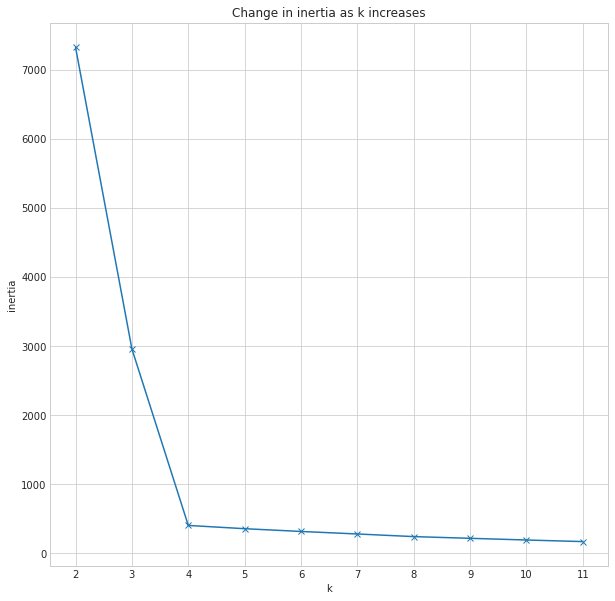

In [49]:
# elbow method to find k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    pd.Series({k: KMeans(k).fit(X_train_value_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [50]:
# define cluster object
kmeans = KMeans(n_clusters=10, random_state = 333)
# fit cluster object to features
kmeans.fit(X_train_development_cluster)
# use the object
kmeans.predict(X_train_development_cluster);

In [51]:
# add cluster features to train and X_train df's
train_scaled['development_cluster'] = kmeans.predict(X_train_development_cluster)
validate_scaled['development_cluster'] = kmeans.predict(X_validate_development_cluster)
test_scaled['development_cluster'] = kmeans.predict(X_test_development_cluster)

X_train_development_cluster['development_cluster'] = kmeans.predict(X_train_development_cluster);

In [52]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X_train_development_cluster.loc[:, X_train_development_cluster.columns != 'development_cluster'].columns)

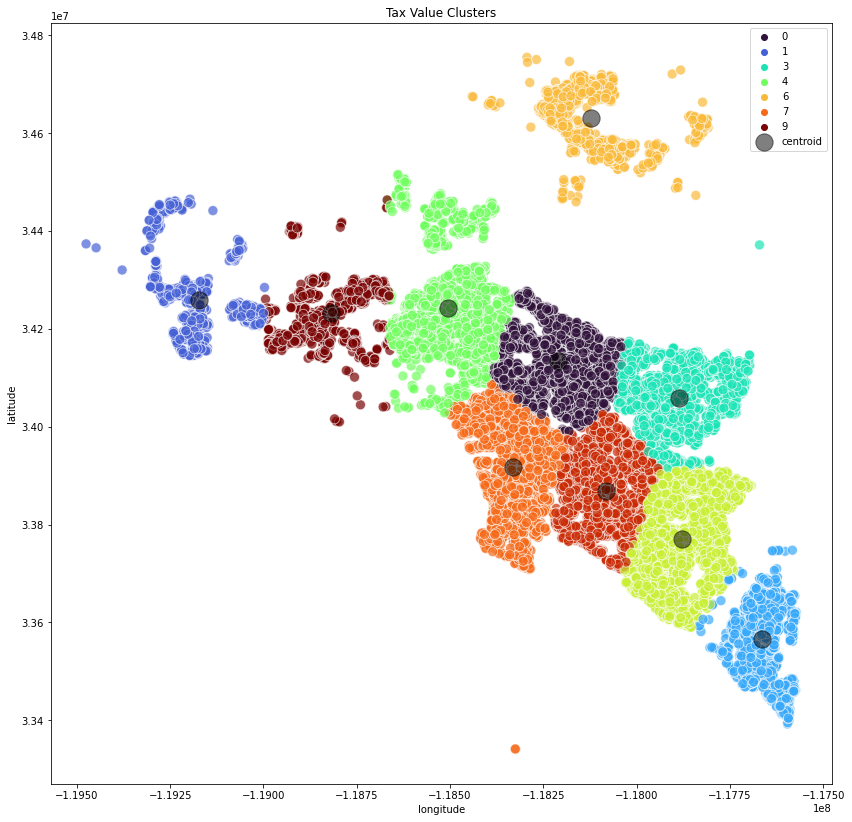

In [53]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_development_cluster, x = 'longitude', y = 'latitude', hue = 'development_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='longitude',y='latitude',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Tax Value Clusters')
plt.legend(loc = 'upper right')

# Statistical Tests

### 1. Is logerror different between clusters based on house features?
- Run anova test

$H_{0}$: Means of the logerror between clusters are equal

$H_{a}$ Means of the logerror between clusters are not equal

In [54]:
from scipy import stats
alpha = 0.5

In [55]:
f, p = stats.f_oneway(train_scaled[train_scaled.feature_cluster == 0].logerror,
                     train_scaled[train_scaled.feature_cluster == 1].logerror,
                     train_scaled[train_scaled.feature_cluster == 2].logerror,
                     train_scaled[train_scaled.feature_cluster == 3].logerror)

In [56]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### The means are different, but is there a correlation between our cluster and logerror?

- pearsonr test

$H_{0}$: There is no correlation between feature clusters and logerror

$H_{a}$ There is a correlation between feature clusters and logerror

In [57]:
x = train_scaled.feature_cluster
y = train_scaled.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


#### There is a small correlation let's visualize it to double check

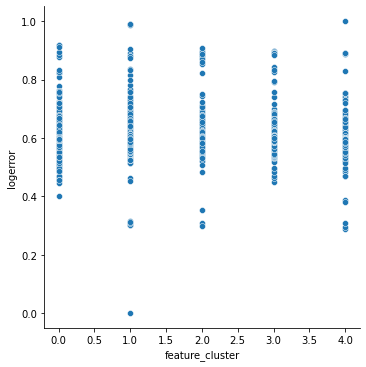

In [58]:
sns.relplot(data = train_scaled, x = 'feature_cluster', y = 'logerror')

### 2. Is logerror different between clusters based on value and is there a correlation between the clusters and logerror?

- Run anova test

$H_{0}$: Means of the logerror between clusters are equal

$H_{a}$ Means of the logerror between clusters are not equal


In [59]:
f, p = stats.f_oneway(train_scaled[train_scaled.value_cluster == 0].logerror,
                     train_scaled[train_scaled.value_cluster == 1].logerror,
                     train_scaled[train_scaled.value_cluster == 2].logerror,
                     train_scaled[train_scaled.value_cluster == 3].logerror)

In [60]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### The means are different, is there a correlation?

- pearsonr test

$H_{0}$: There is no correlation between feature clusters and logerror

$H_{a}$ There is a correlation between feature clusters and logerror

In [61]:
x = train_scaled.value_cluster
y = train_scaled.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


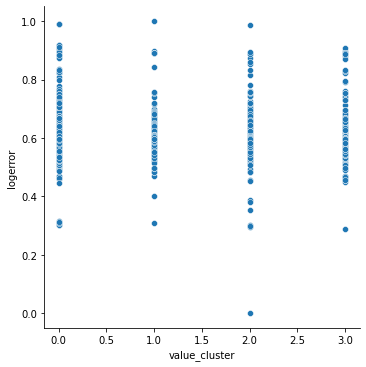

In [62]:
sns.relplot(data = train_scaled, x = 'value_cluster', y = 'logerror')

There is a correlation between clusters based on tax value and logerror, we can use this new feature in our modeling.

### 3. Is logerror different between clusters based on location and age and is there a correlation between the clusters and logerror?

- Run anova test

$H_{0}$: Means of the logerror between clusters are equal

$H_{a}$ Means of the logerror between clusters are not equal


In [63]:
f, p = stats.f_oneway(train_scaled[train_scaled.development_cluster == 0].logerror,
                     train_scaled[train_scaled.development_cluster == 1].logerror,
                     train_scaled[train_scaled.development_cluster == 2].logerror,
                     train_scaled[train_scaled.development_cluster == 3].logerror)

In [64]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### The means are not different, is there a correlation?

- pearsonr test

$H_{0}$: There is no correlation between feature clusters and logerror

$H_{a}$ There is a correlation between feature clusters and logerror

In [65]:
x = train_scaled.development_cluster
y = train_scaled.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


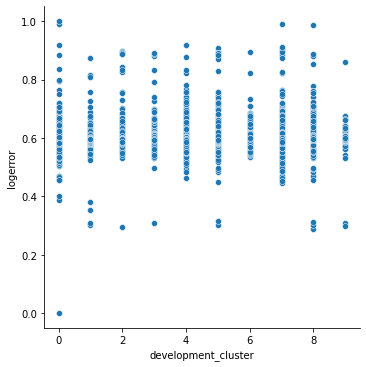

In [66]:
sns.relplot(data = train_scaled, x = 'development_cluster', y = 'logerror')

There is a correlation between clusters based on tax value and logerror, we can use this new feature in our modeling.

### 4. Is there a correlation between bedroom count and logerror?

- pearsonr test

$H_{0}$: There is no correlation between bedroom count and logerror

$H_{a}$ There is a correlation between bedroom count and logerror

In [67]:
x = train.bedroomcnt
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


#### There is a correlation between bedroom count and logerror
Let's visualize

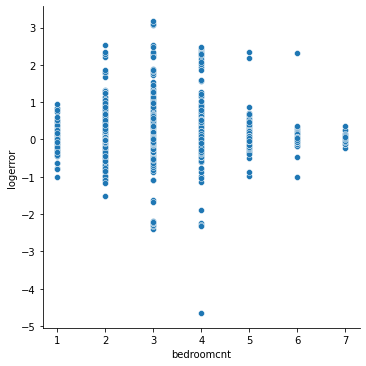

In [68]:
sns.relplot(data = train, x = 'bedroomcnt', y = 'logerror')

The log error is greater within the second quartile of the bedroomcnt

### 5. Is there a correlation between bathroom count and logerror?

- pearsonr test

$H_{0}$: There is no correlation between bathroom count and logerror

$H_{a}$ There is a correlation between bathroom count and logerror

In [69]:
x = train.bathroomcnt
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


#### There is a correlation between bathroom count and logerror

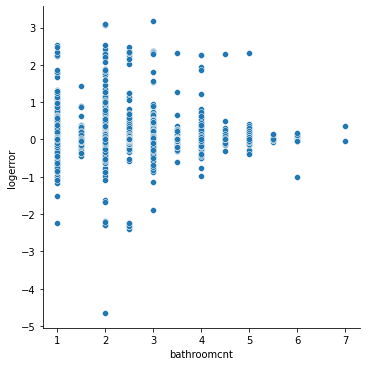

In [70]:
sns.relplot(data = train, x = 'bathroomcnt', y = 'logerror')

It looks like the first quartile has greater log error

### 6. Is there a correlation between calculatedfinishedsquarefeet and logerror?

- pearsonr test

$H_{0}$: There is no correlation between finished square feet and logerror

$H_{a}$ There is a correlation between finished square feet and logerror

In [71]:
x = train.calculatedfinishedsquarefeet
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


There is a correlation between finished square feet and logerror

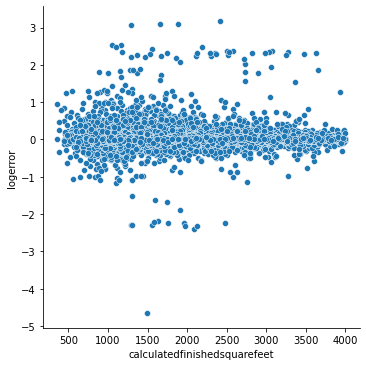

In [72]:
sns.relplot(data = train, x = 'calculatedfinishedsquarefeet', y = 'logerror')

## Distribution of our data


In [73]:
train_scaled.columns.to_list()

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'acres',
 'age',
 'dollar_per_sqft',
 'dollar_per_acre',
 'feature_cluster',
 'value_cluster',
 'development_cluster']

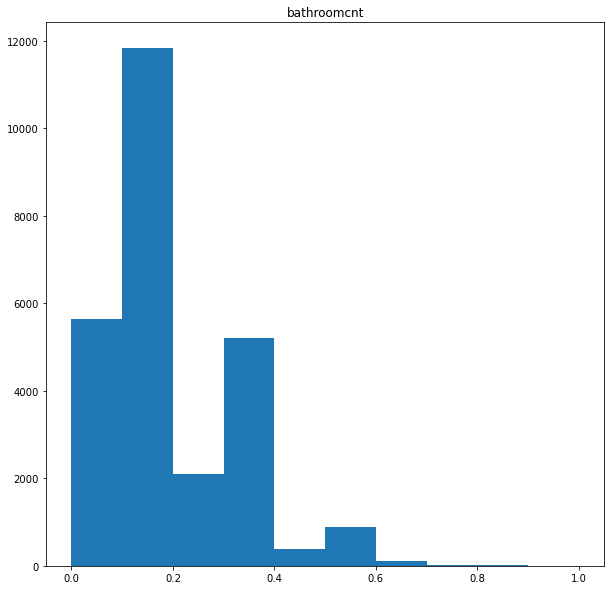

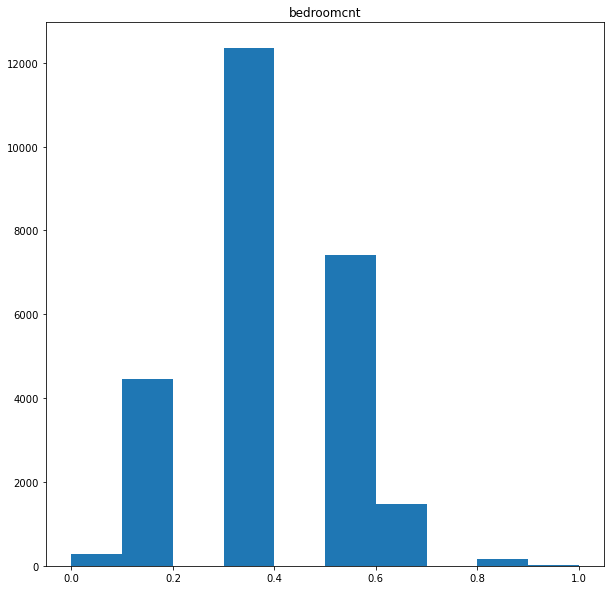

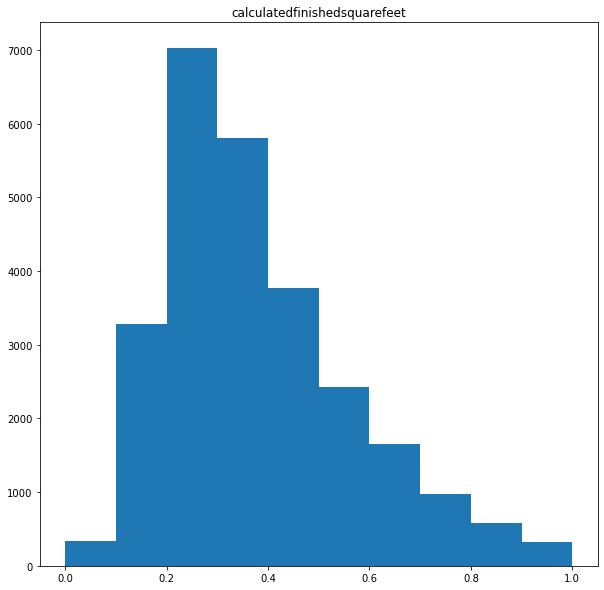

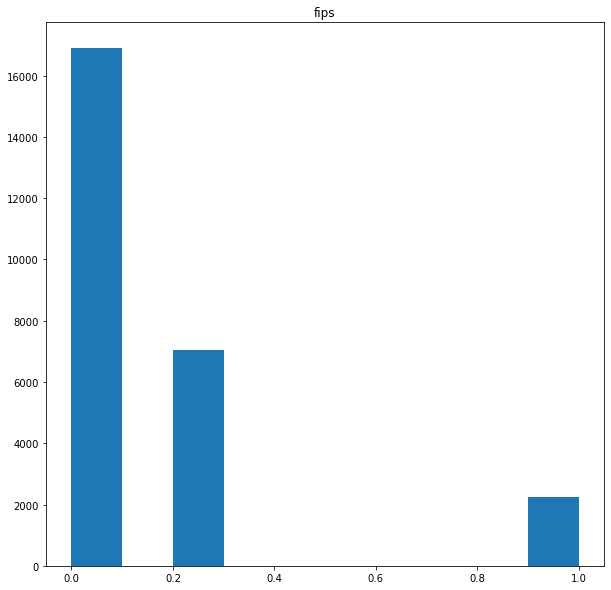

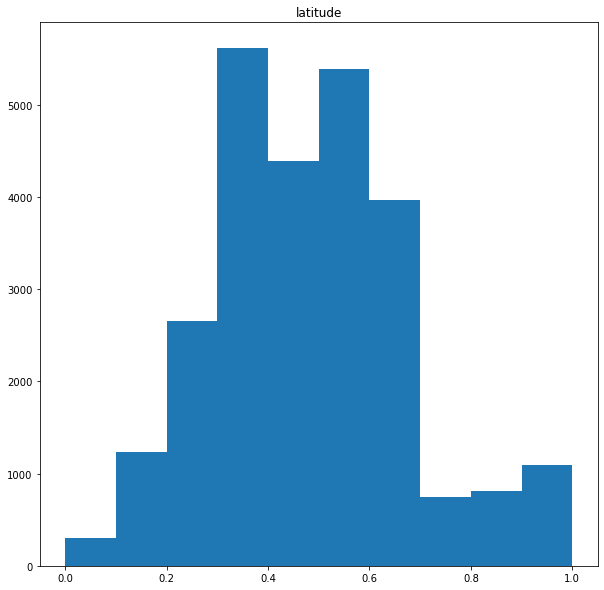

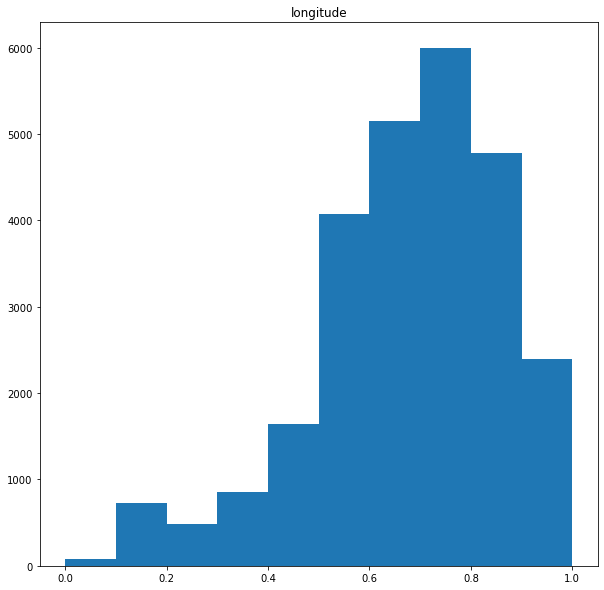

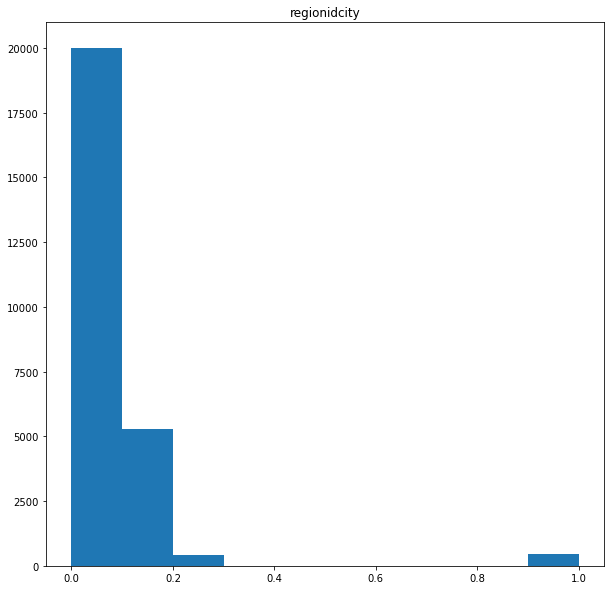

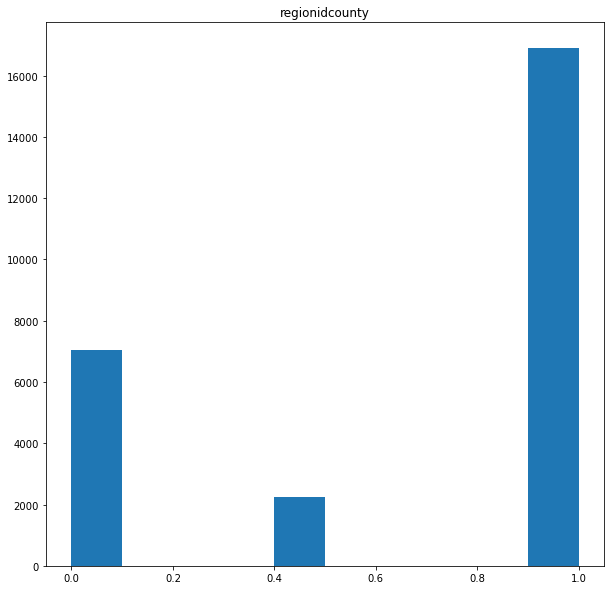

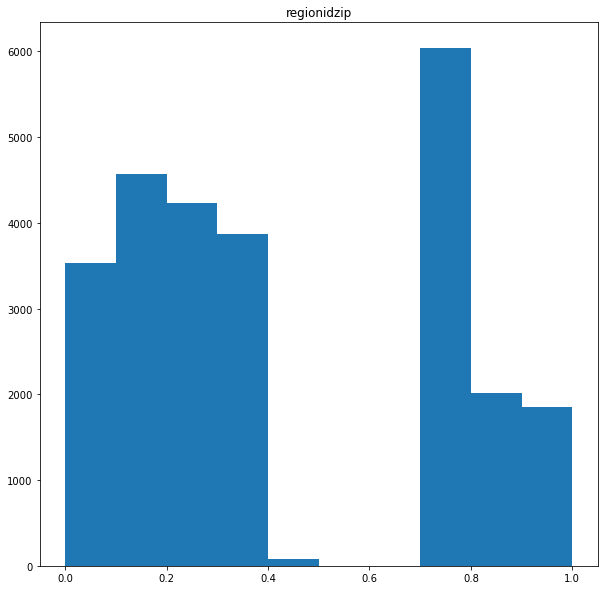

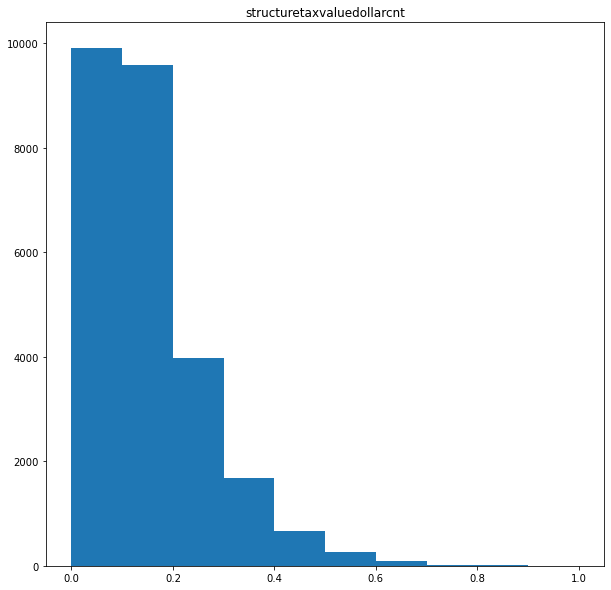

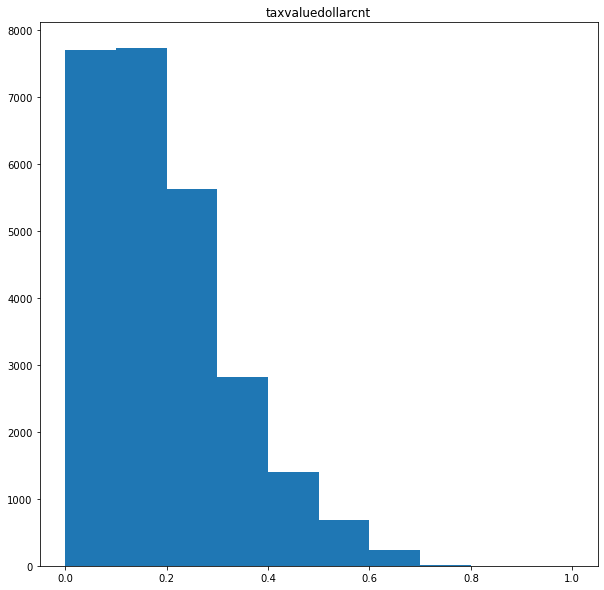

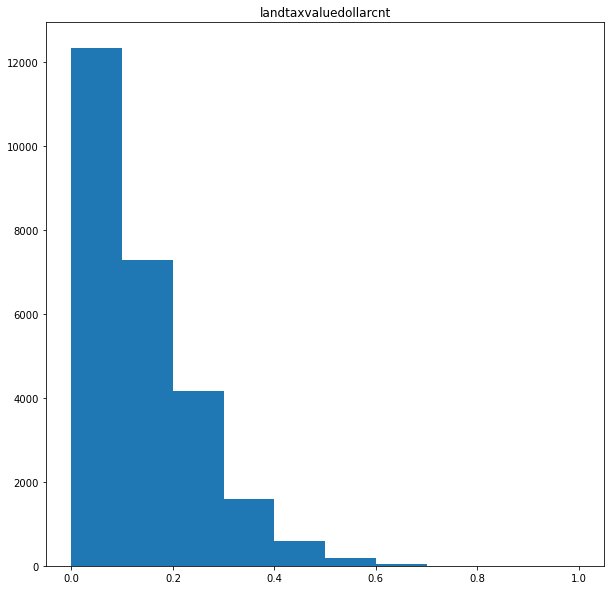

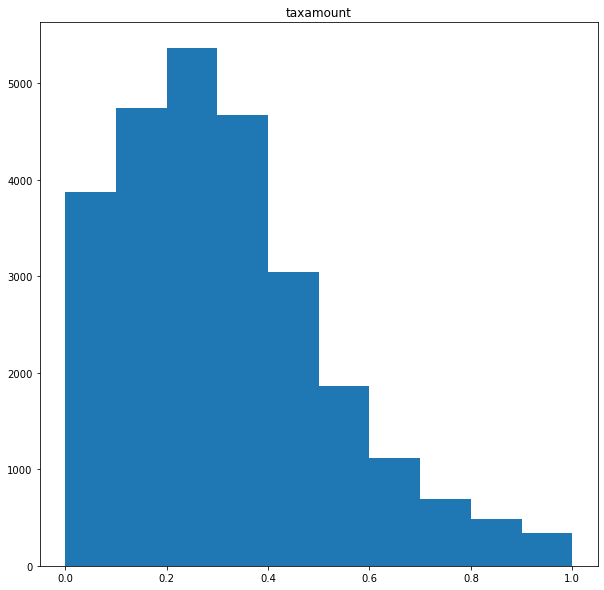

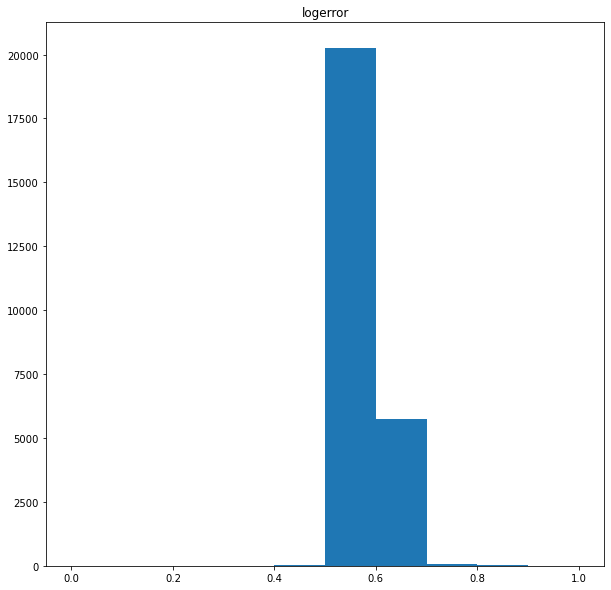

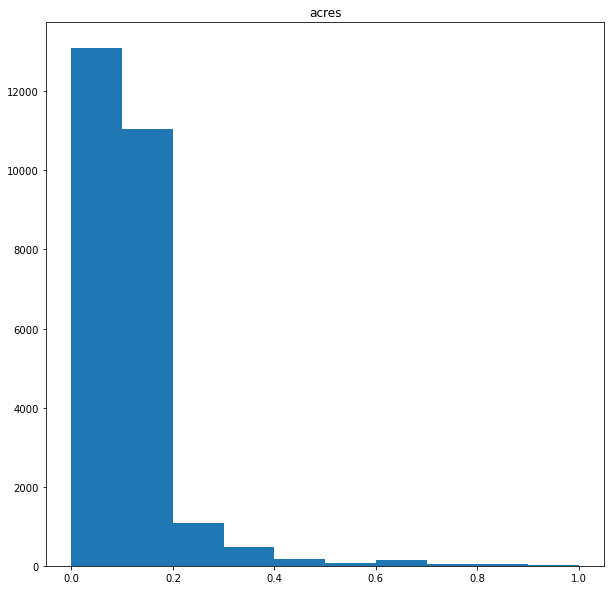

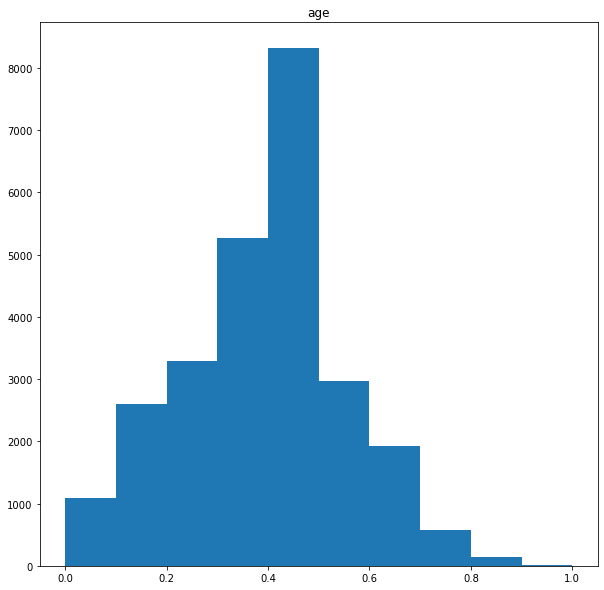

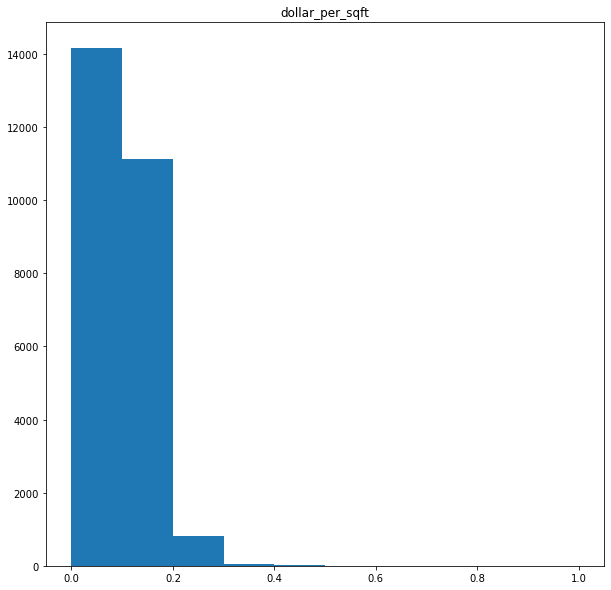

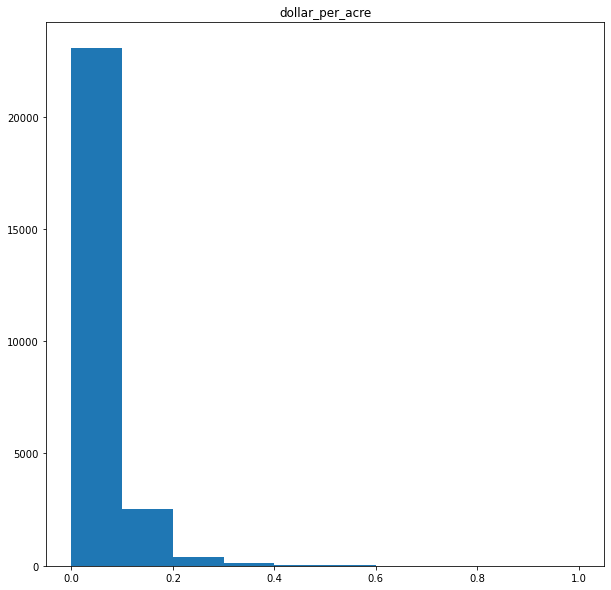

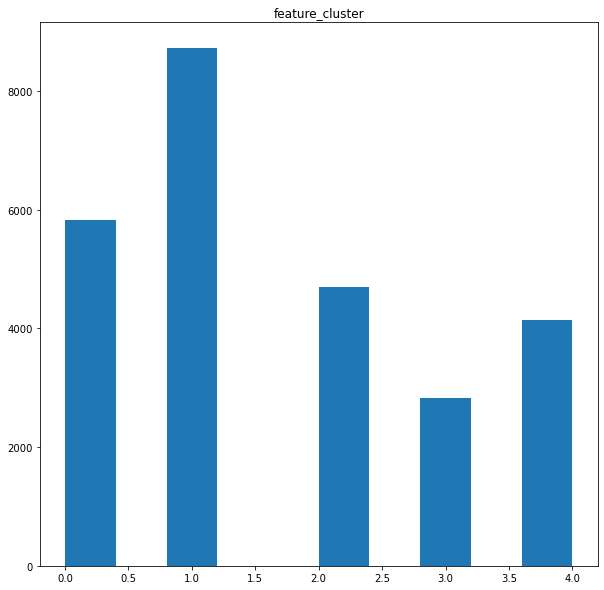

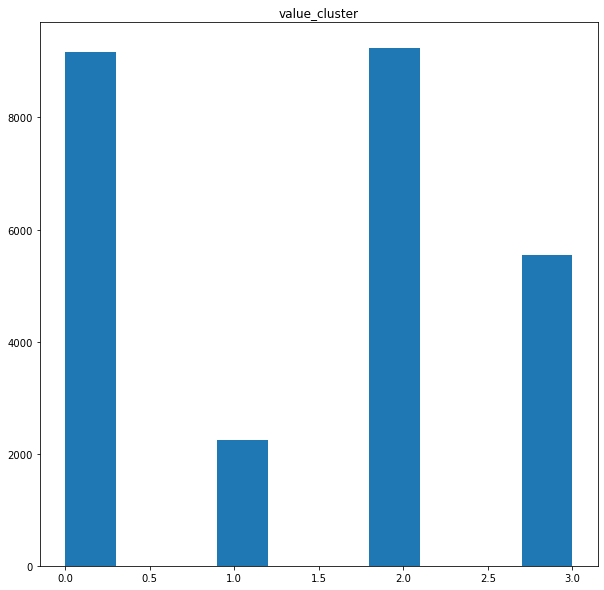

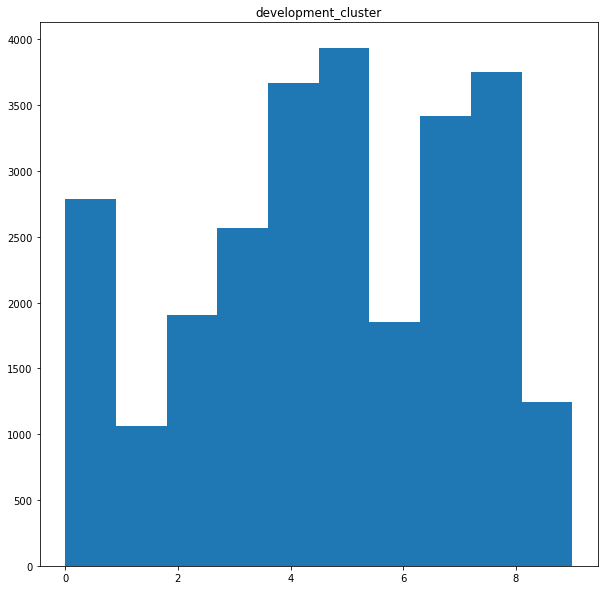

In [74]:
for col in train_scaled.columns:
    plt.figure(figsize=(10,10))
    plt.hist(train_scaled[col])
    plt.title(col)

## Exploration Summary

1. Feature Engineering
    - Features created
        - Acres: lot sq ft / 43560
        - dollar_per_sqft: structure tax value / finished sq ft
        - dollar_per_acre: land tax value / acre
        - 
2. Clusters
    - Our clusters have some correlation between logerror
    - Cluster 1 will not be used for modeling
    - Cluster 2 and 3 can be used for modeling
3. Driving Features
    - Bed
    - Bath
    - Sq Ft
    - Tax Value

# Modeling: Predicting logerror

In [75]:
#import linear regression modules
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

#import evaluation metrics
from sklearn.metrics import mean_squared_error, explained_variance_score

In [76]:
X_train = train_scaled.drop(columns = 'logerror')
y_train = train.logerror
X_validate = validate_scaled.drop(columns = 'logerror')
y_validate = validate.logerror
X_test = test_scaled.drop(columns = 'logerror')
y_test = test.logerror

## Baseline


In [77]:
# Create dataframes of the target for modeling purposes
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# predict mean
pred_mean = y_train.logerror.mean()
y_train['baseline_pred_mean'] = pred_mean
y_validate['baseline_pred_mean'] = pred_mean

# RMSE of mean
rmse_train = mean_squared_error(y_train.logerror, y_train.baseline_pred_mean)**(1/2)
print("Train/In-Sample RMSE: ", round(rmse_train, 2))
# evs of mean
evs = explained_variance_score(y_train.logerror, y_train.baseline_pred_mean)
print('Explained Variance of Mean Baseline: ', round(evs,3))

# validate rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.baseline_pred_mean)**(1/2)
print("Validate/Out-of-Sample RMSE: ", round(rmse_validate, 2))
# validate evs
evs = explained_variance_score(y_train.logerror, y_train.baseline_pred_mean)
print('Explained Variance of Mean Baseline: ', round(evs,3))

Train/In-Sample RMSE:  0.17
Explained Variance of Mean Baseline:  0.0
Validate/Out-of-Sample RMSE:  0.16
Explained Variance of Mean Baseline:  0.0


## Model 1: OLS

In [78]:
# Create model
lm = LinearRegression(normalize=True,)

# fit the model to training data.
lm.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

print("Training/In-Sample RMSE: ", rmse_train)
evs = explained_variance_score(y_train.logerror, y_train.logerror_pred_lm)
print('Train Explained Variance: ', round(evs,3))


Training/In-Sample RMSE:  0.1691676027971319
Train Explained Variance:  0.005


### Evaluate on Validate

In [79]:
# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate)

# evaluate rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

# evaluate evs
evs = explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)
print("Validation/Out-of-Sample RMSE:", rmse_validate,'\nValidate Explained Variance: ', round(evs,3))


Validation/Out-of-Sample RMSE: 0.15907676273204727 
Validate Explained Variance:  0.005


## Model 2: GLM

In [80]:
X_train.shape

(26187, 20)

In [81]:
y_train

,logerror,baseline_pred_mean,logerror_pred_lm
58664,0.009815,0.017804,0.034921
58627,0.078906,0.017804,0.029673
4891,0.014183,0.017804,0.009578
75490,0.009918,0.017804,0.039685
58604,-0.037152,0.017804,0.002398
...,...,...,...
54280,-0.064756,0.017804,0.014777
19168,0.021380,0.017804,0.035894
49013,0.039788,0.017804,0.021316
62465,0.022888,0.017804,0.014473


In [82]:
# create the model object
glm = TweedieRegressor(power = 0, alpha=0.5)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(1/2)

# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

evs = explained_variance_score(y_train.logerror, y_train.logerror_pred_glm)
print('Train Explained Variance = ', round(evs,3))
evs = explained_variance_score(y_validate.logerror, y_validate.logerror_pred_glm)
print('Validate Explained Variance = ', round(evs,3))

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.16944101421467297 
Validation/Out-of-Sample:  0.15935662654903934
Train Explained Variance =  0.001
Validate Explained Variance =  0.002


## Model 3: LassoLars

In [83]:
# create the model object
lars = LassoLars(alpha=10)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

evs = explained_variance_score(y_train.logerror, y_train.logerror_pred_lars)
print('Train Explained Variance = ', round(evs,3))
evs = explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lars)
print('Validate Explained Variance = ', round(evs,3))

RMSE for Lasso + Lars
Training/In-Sample:  0.1695546484055886 
Validation/Out-of-Sample:  0.1594845483479586
Train Explained Variance =  0.0
Validate Explained Variance =  0.0


## Model 4: Polynomial

In [84]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [85]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**(1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

evs = explained_variance_score(y_train.logerror, y_train.logerror_pred_lm2)
print('Train Explained Variance = ', round(evs,3))
evs = explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm2)
print('Validate Explained Variance = ', round(evs,3))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16817238429993192 
Validation/Out-of-Sample:  0.1597656816928637
Train Explained Variance =  0.016
Validate Explained Variance =  -0.004


## Evaluate on Test

In [86]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['logerror_pred_lars'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.logerror_pred_lars)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

evs = explained_variance_score(y_test.logerror, y_test.logerror_pred_lars)
print('Test Explained Variance = ', round(evs,3))

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  0.17139495333026278
Test Explained Variance =  0.0
